In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
df = pd.read_csv('/Users/aceboogie/Desktop/yelp_labelled.txt', delimiter='\t', header=None)

# Rename the columns
df.columns = ['sentence', 'sentiment']

# Preprocess the text
df['sentence'] = df['sentence'].str.lower() # convert to lowercase
df['sentence'] = df['sentence'].str.replace('[^\w\s]','') # remove punctuation

# Split into train and test sets
train, test = train_test_split(df, test_size=0.2, random_state=42)

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train['sentence'])
vocab_size = len(tokenizer.word_index) + 1

# Convert text to sequences
train_sequences = tokenizer.texts_to_sequences(train['sentence'])
test_sequences = tokenizer.texts_to_sequences(test['sentence'])

# Pad the sequences
maxlen = max(len(x) for x in train_sequences) # you might want to choose a smaller value based on your text data
train_sequences = pad_sequences(train_sequences, maxlen=maxlen)
test_sequences = pad_sequences(test_sequences, maxlen=maxlen)

# Define the model
embedding_dim = 100 # choose the size based on your requirements

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model.add(LSTM(units=50, dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Define the early stopping criteria
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1)


# Train the model
model.fit(train_sequences, train['sentiment'], validation_data=(test_sequences, test['sentiment']), epochs=10, batch_size=32, callbacks=[early_stop])


/var/folders/7h/d1wz9q2901z6f4x7gmz0vxtm0000gn/T/ipykernel_3268/2470068933.py:18: FutureWarning: The default value of regex will change from True to False in a future version.
  df['sentence'] = df['sentence'].str.replace('[^\w\s]','') # remove punctuation


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 32, 100)           182700    
                                                                 
 lstm_2 (LSTM)               (None, 50)                30200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 212,951
Trainable params: 212,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10


2023-06-01 13:45:12.242648: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-01 13:45:12.245602: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-01 13:45:12.250640: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

23/25 [==========================>...] - ETA: 0s - loss: 0.6879 - accuracy: 0.5462

2023-06-01 13:45:16.833998: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-01 13:45:16.835626: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-01 13:45:16.837632: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

25/25 [==============================] - 5s 48ms/step - loss: 0.6877 - accuracy: 0.5500 - val_loss: 0.6784 - val_accuracy: 0.6650
Epoch 2/10
25/25 [==============================] - 1s 21ms/step - loss: 0.6240 - accuracy: 0.7575 - val_loss: 0.6115 - val_accuracy: 0.7000
Epoch 3/10
25/25 [==============================] - 1s 23ms/step - loss: 0.4322 - accuracy: 0.8325 - val_loss: 0.4959 - val_accuracy: 0.7600
Epoch 4/10
25/25 [==============================] - 1s 24ms/step - loss: 0.2410 - accuracy: 0.9250 - val_loss: 0.4796 - val_accuracy: 0.7900
Epoch 5/10
25/25 [==============================] - 1s 44ms/step - loss: 0.1613 - accuracy: 0.9525 - val_loss: 0.4678 - val_accuracy: 0.7900
Epoch 6/10
25/25 [==============================] - 1s 37ms/step - loss: 0.0903 - accuracy: 0.9800 - val_loss: 0.4955 - val_accuracy: 0.7850
Epoch 7/10
25/25 [==============================] - 1s 40ms/step - loss: 0.0544 - accuracy: 0.9950 - val_loss: 0.5835 - val_accuracy: 0.7900
Epoch 7: early stopping


In [8]:
# Save the prepared training and testing datasets
train.to_csv('prepared_train_dataset.csv', index=False)
test.to_csv('prepared_test_dataset.csv', index=False)


In [9]:
# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 32, 100)           182700    
                                                                 
 lstm_2 (LSTM)               (None, 50)                30200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 212,951
Trainable params: 212,951
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
25/25 [==============================] - 1s 44ms/step - loss: 0.0299 - accuracy: 0.9962 - val_loss: 0.7568 - val_accuracy: 0.7800
Epoch 2/10
25/25 [==============================] - 1s 36ms/step - loss: 0.0218 - accuracy: 0.9962 - val_loss: 0.6778 - val_accuracy: 0.7800
Epoch 3/10
25/25 [==============================] - 1s 33ms/step - loss: 0.0170 - accuracy: 0.9962 - val_loss: 0.7187 - val_accuracy: 0.7900
Epoch 4/10
25/25 [==============================] - 1s 24ms/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 0.8793 - val_accuracy: 0.7800
Epoch 4: early stopping


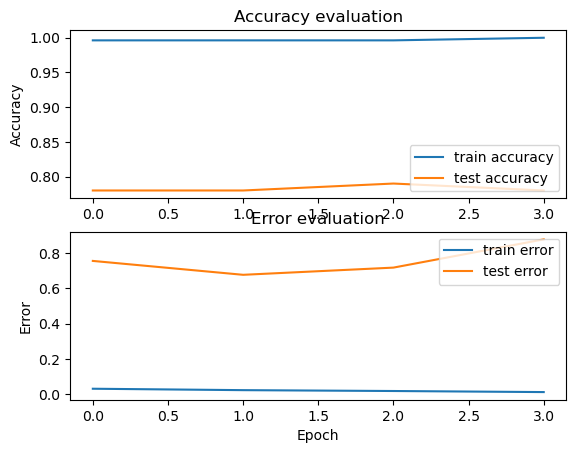

In [11]:
import matplotlib.pyplot as plt

# Train the model and save its history
history = model.fit(train_sequences, train['sentiment'], validation_data=(test_sequences, test['sentiment']), epochs=10, batch_size=32, callbacks=[early_stop])



def plot_training_history(history):
    fig, axs = plt.subplots(2)

    # create the accuracy subplot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy evaluation")

    # create the error subplot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error evaluation")

    plt.show()

# assuming history is your model's history object
plot_training_history(history)


In [ ]:
# Save the entire model to a HDF5 file.
model.save('my_model.h5') 

# Save the weights
model.save_weights('my_model_weights.h5')